In [24]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('data/ispu_dki_all_clean.csv')
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
4621,2023-11-26,DKI1 (Bunderan HI),55.0,43.0,15.0,15.0,25.0,75.0,PM25,SEDANG
4622,2023-11-27,DKI3 (Jagakarsa),54.0,56.0,13.0,27.0,16.0,77.0,PM25,SEDANG
4623,2023-11-28,DKI1 (Bunderan HI),62.0,45.0,15.0,29.0,34.0,96.0,PM25,SEDANG
4624,2023-11-29,DKI4 (Lubang Buaya),71.0,30.0,19.0,22.0,14.0,105.0,PM25,TIDAK SEHAT


# Pertanyaan

## 1. Pada hari apa kualitas udara cenderung memburuk, atau bagaimana tren perubahan nilai parameter setiap hari?
    - Metode        : Analisis pola waktu harian dengan menggunakan data parameter .
    - Grafik        : Line chart.
    - Jenis Analisis: Exploratory

In [26]:
# Convert the 'tanggal' column to datetime format
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Extract the day of the week
df['hari'] = df['tanggal'].dt.day_name()

# Calculate the daily average for each parameter
daily_avg = df.groupby('hari')[['pm10', 'so2', 'co', 'o3', 'no2']].mean()

# Reorder the days to match the calendar week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(day_order)

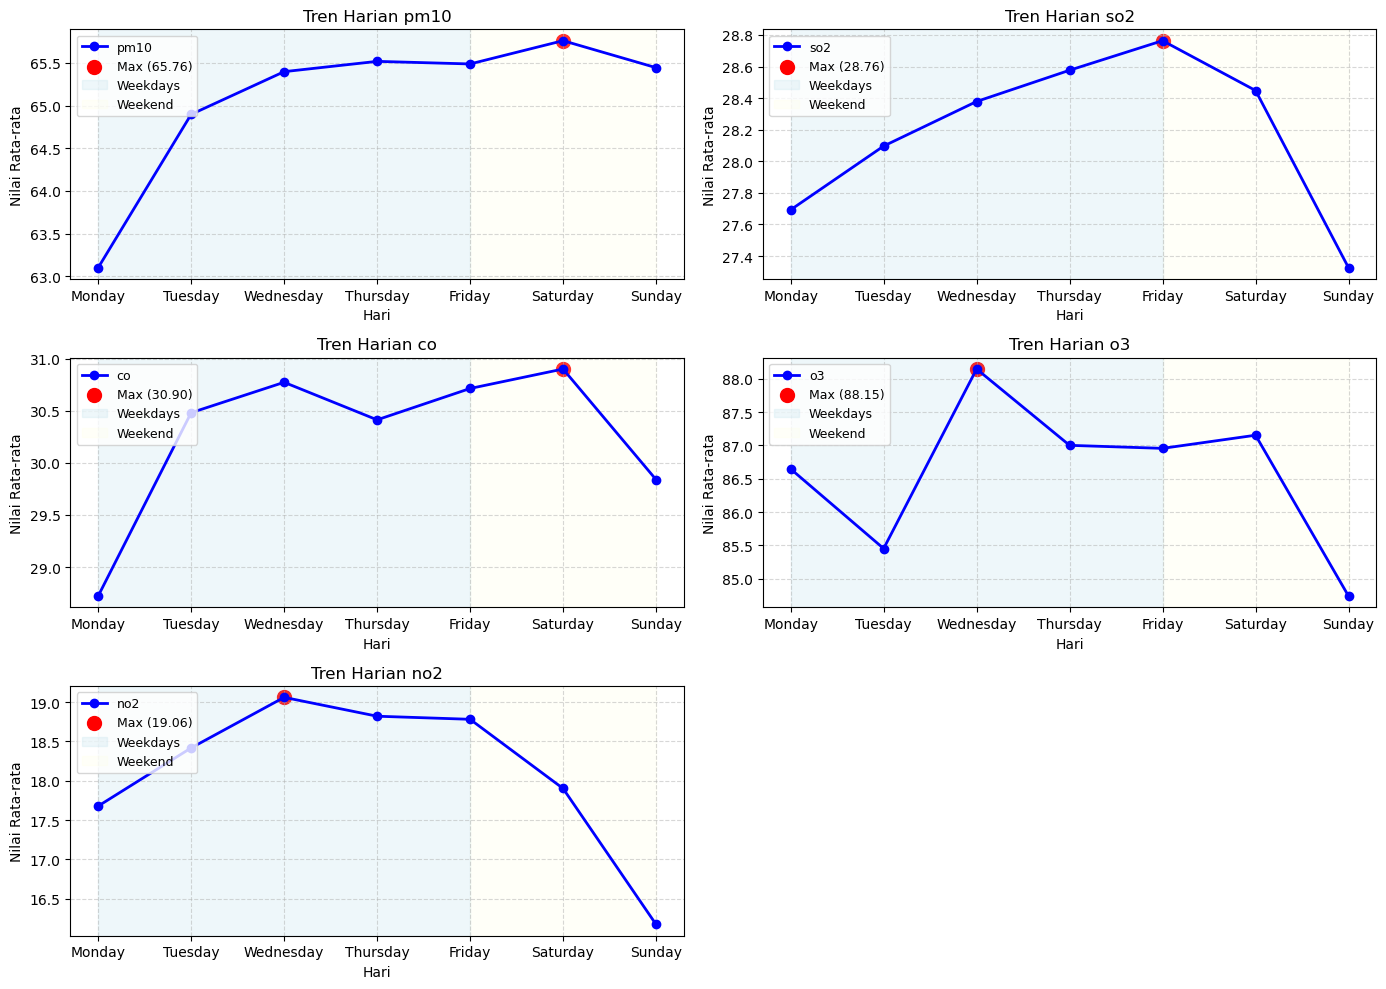

In [27]:
# Enhanced style for the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

parameters = daily_avg.columns

for i, parameter in enumerate(parameters):
    ax = axes[i]
    data = daily_avg[parameter]
    
    # Line plot for the parameter
    ax.plot(daily_avg.index, data, marker='o', color='blue', linewidth=2, label=parameter)
    
    # Highlight maximum value
    max_value = data.max()
    max_index = data.idxmax()
    ax.scatter(x=max_index, y=max_value, color='red', s=100, label=f'Max ({max_value:.2f})')
    
    # Add shaded area to distinguish working days and weekend
    ax.axvspan(0, 4, color='lightblue', alpha=0.2, label='Weekdays')
    ax.axvspan(4, 6, color='lightyellow', alpha=0.2, label='Weekend')
    
    # Grid, labels, and title
    ax.set_title(f'Tren Harian {parameter}', fontsize=12)
    ax.set_xlabel('Hari', fontsize=10)
    ax.set_ylabel('Nilai Rata-rata', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=9, loc='upper left')

# Remove the extra subplot if any
if len(parameters) < len(axes):
    for j in range(len(parameters), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## 2. Berapa nilai tertinggi dan terendah dari parameter di lokasi tersebut dalam rentang bulan?
    - Metode         : Identifikasi nilai maksimum dan minimum dari parameter di dataset untuk periode bulanan.
    - Grafik         : Bar chart atau Annotated Line Chart untuk menyoroti nilai ekstrem.
    - Jenis Analisis : Explanatory.

In [32]:
df = pd.read_csv('data/ispu_dki_all_clean.csv')
df.head(1)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG


In [34]:
# Ensure 'tanggal' column is in datetime format
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Add a 'month_year' column for grouping by month
df['month_year'] = df['tanggal'].dt.to_period('M')

# Calculate max and min values for each parameter grouped by month
extremes = df.groupby('month_year')[['pm10', 'so2', 'co', 'o3', 'no2']].agg(['max', 'min'])

# Flatten the multi-level columns
extremes.columns = ['_'.join(col).strip() for col in extremes.columns]

# Reset index for easier plotting
extremes.reset_index(inplace=True)

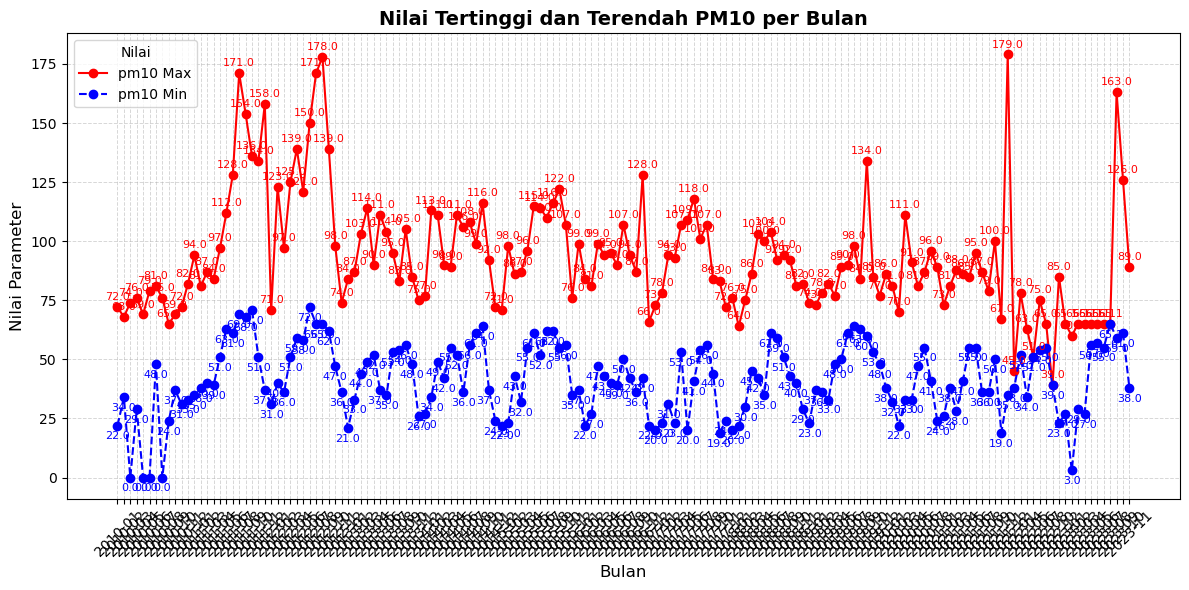

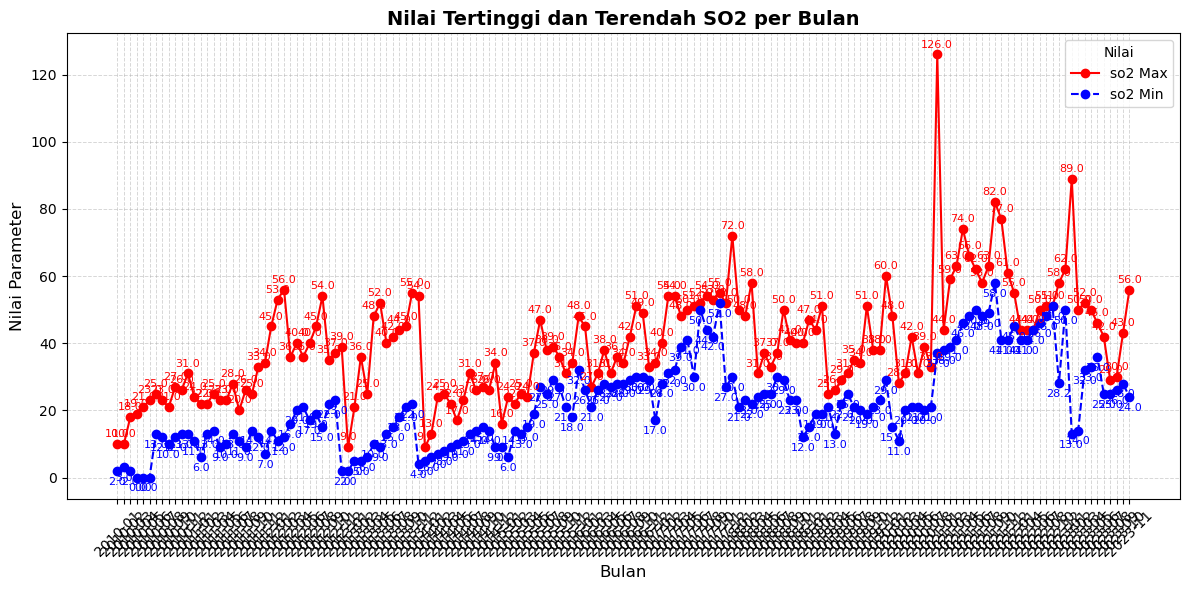

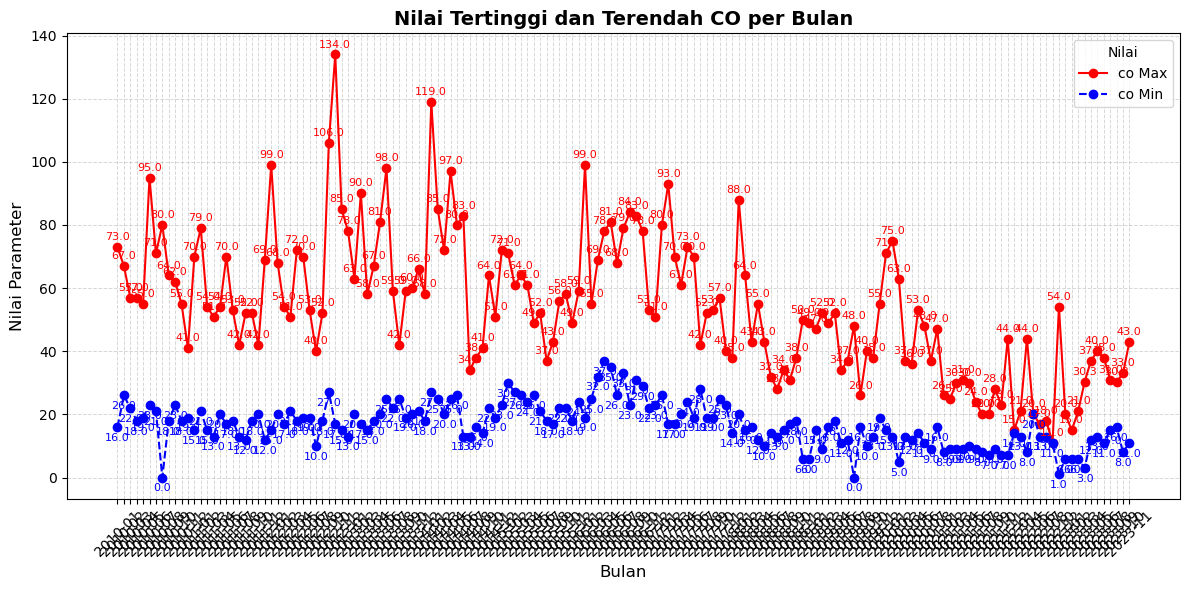

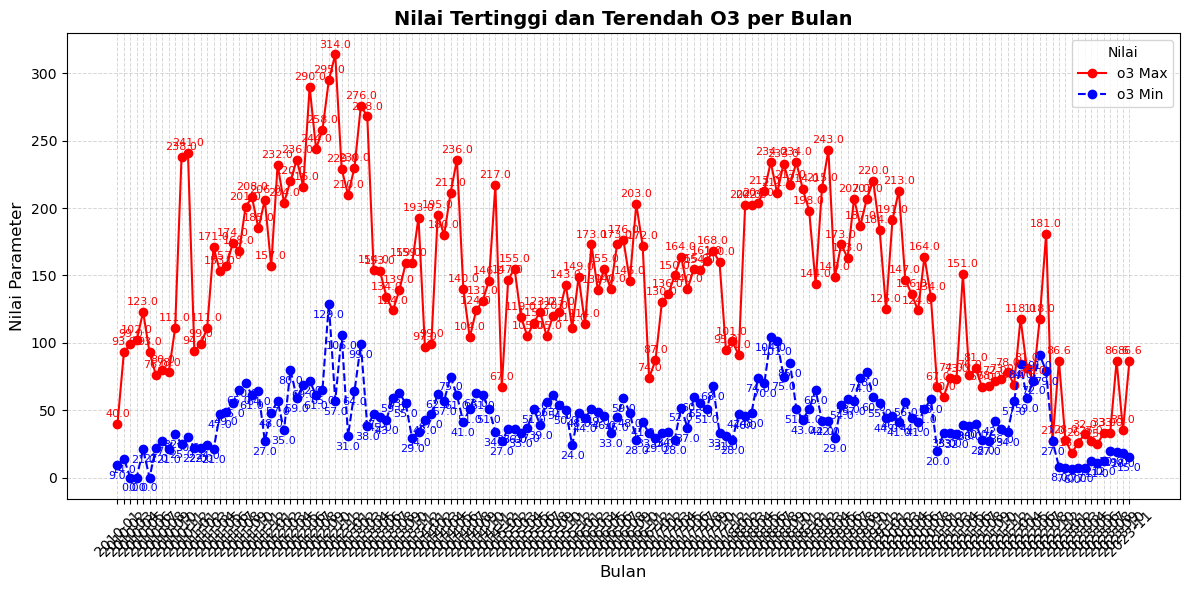

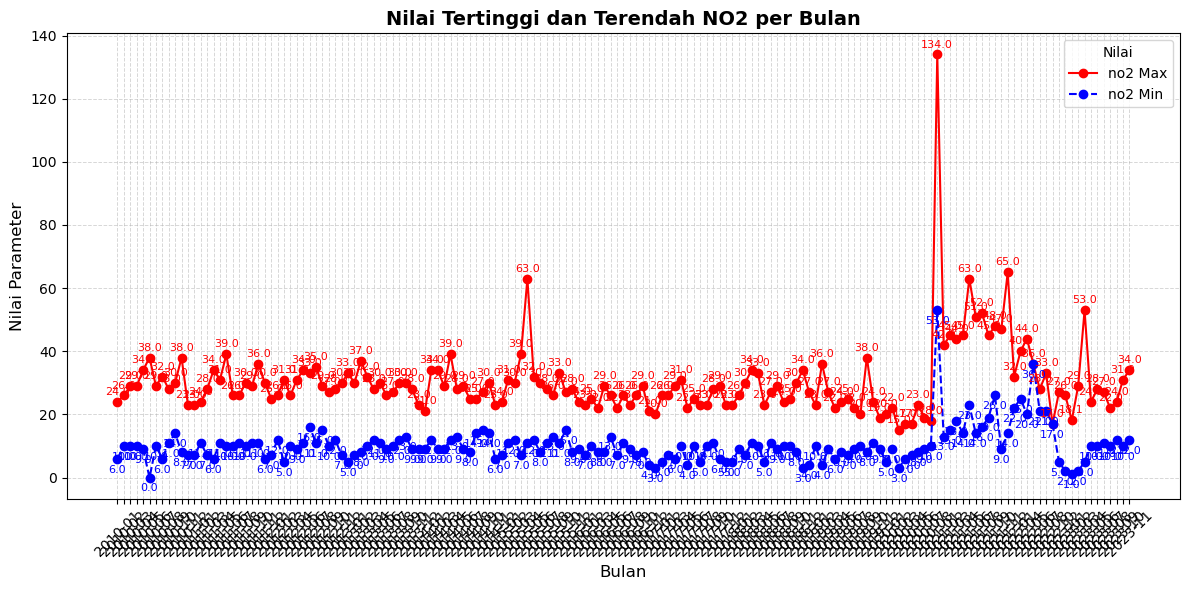

In [35]:
# Create separate plots for each parameter
parameters = ['pm10', 'so2', 'co', 'o3', 'no2']

for parameter in parameters:
    plt.figure(figsize=(12, 6))
    
    # Plot max and min values for the parameter
    plt.plot(extremes['month_year'].astype(str), extremes[f'{parameter}_max'], marker='o', label=f'{parameter} Max', color='red')
    plt.plot(extremes['month_year'].astype(str), extremes[f'{parameter}_min'], marker='o', linestyle='--', label=f'{parameter} Min', color='blue')
    
    # Annotate extreme points
    for i, month in enumerate(extremes['month_year'].astype(str)):
        plt.annotate(f"{extremes[f'{parameter}_max'].iloc[i]:.1f}",
                     (month, extremes[f'{parameter}_max'].iloc[i]),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='red')
        plt.annotate(f"{extremes[f'{parameter}_min'].iloc[i]:.1f}",
                     (month, extremes[f'{parameter}_min'].iloc[i]),
                     textcoords="offset points", xytext=(0, -10), ha='center', fontsize=8, color='blue')
    
    # Customize the plot
    plt.title(f'Nilai Tertinggi dan Terendah {parameter.upper()} per Bulan', fontsize=14, fontweight='bold')
    plt.xlabel('Bulan', fontsize=12)
    plt.ylabel('Nilai Parameter', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)
    plt.legend(fontsize=10, title='Nilai')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## 3. Informasi Potensi Dampak Kesehatan dengan mencari nilai tertinggi dari setiap parameter, dan parameter apa yang tinggi?
    - Metode         : Analisis perbandingan nilai rata-rata tertinggi parameter terhadap standar atau ambang batas kualitas udara.
    - Grafik         : Tree Map atau Bubble Chart untuk menunjukkan kontribusi setiap parameter terhadap kualitas udara.
    - Jenis Analisis : Explanatory.

## 4. Menampilkan setiap parameter lebih tinggi & rendah pada waktu tersebut?
    - Metode         : Analisis statistik deskriptif untuk menentukan waktu spesifik (misalnya pagi, siang, sore, malam) dengan nilai parameter tertinggi dan terendah.
    - Grafik         : Boxplot atau Clustered Bar Chart untuk membandingkan waktu-waktu tertentu.
    - Jenis Analisis : Exploratory.